# Binary Classification implementation with Numerical data

This notebook will walk through how to do binary classifications with numerical data

In [1]:
import pandas as pd

### Gender voice dataset
#### Source : https://www.mldata.io/dataset-details/gender_voice/
meanfreq	-	mean frequency (in kHz)

sd	        -	standard deviation of frequency

median   	- median frequency (in kHz)

IQR	        -	interquantile range (in kHz)

sp.ent	    -	spectral entropy

centroid	-	frequency centroid (see specprop)

minfun	    -	minimum fundamental frequency measured across acoustic signal

label	    -	Predictor class, male or female

In [2]:
data = pd.read_csv('datasets/gender_voice_dataset.csv')

data.sample(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1212,0.194217,0.065705,0.191340,0.133748,0.259540,0.125792,2.350558,9.299228,0.893324,0.403050,...,0.194217,0.126159,0.047809,0.279070,1.102865,0.023438,5.015625,4.992188,0.184319,male
1782,0.174633,0.034746,0.173753,0.164010,0.183264,0.019254,3.825210,19.691720,0.825177,0.258850,...,0.174633,0.174703,0.146789,0.271186,0.681452,0.156250,6.195312,6.039062,0.164812,female
2658,0.192529,0.035074,0.194521,0.167123,0.212603,0.045479,1.973960,6.661244,0.856234,0.219085,...,0.192529,0.158203,0.049281,0.248705,1.480363,0.164062,7.734375,7.570312,0.186305,female
293,0.097464,0.093731,0.060057,0.008808,0.159352,0.150543,10.812681,148.817031,0.878622,0.533373,...,0.097464,0.089682,0.016211,0.275862,0.292295,0.007812,5.054688,5.046875,0.105927,male
1633,0.193074,0.067900,0.213417,0.187057,0.233724,0.046667,2.159675,7.639542,0.914283,0.499962,...,0.193074,0.147149,0.015656,0.275862,0.425881,0.007812,6.546875,6.539062,0.078982,female
2326,0.229041,0.043025,0.237474,0.221053,0.253474,0.032421,2.462757,8.864676,0.839626,0.262860,...,0.229041,0.175148,0.047619,0.272727,2.070312,0.023438,11.132812,11.109375,0.117332,female
2490,0.205578,0.032539,0.206729,0.194393,0.217570,0.023178,2.800742,10.609149,0.813510,0.190620,...,0.205578,0.182353,0.047431,0.279070,0.996512,0.023438,6.187500,6.164062,0.122588,female
1105,0.189809,0.057016,0.202868,0.136830,0.241434,0.104604,0.795922,2.627216,0.917883,0.353845,...,0.189809,0.143059,0.048387,0.277457,1.173018,0.023438,5.273438,5.250000,0.199836,male
179,0.134106,0.064399,0.109854,0.086180,0.181727,0.095547,2.874535,13.648456,0.933989,0.572281,...,0.134106,0.093560,0.015733,0.271186,0.239583,0.007812,3.382812,3.375000,0.093533,male
1280,0.176249,0.076477,0.189526,0.118162,0.251532,0.133370,2.258821,9.384604,0.940659,0.584654,...,0.176249,0.130735,0.048000,0.279070,0.464062,0.023438,3.070312,3.046875,0.067483,male


In [3]:
data.shape

(3168, 21)

### Describing values

In [4]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

### Label encoding 

In [6]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
data['label'] = labelEncoder.fit_transform(data['label'].astype(str))

data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


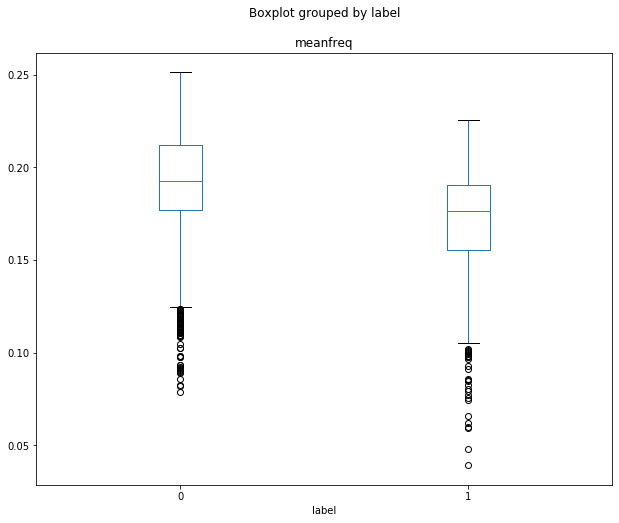

In [7]:
data.boxplot(by ='label', column =['meanfreq'], grid = False, figsize=(10, 8))

### Spilting the data into train and test data

In [8]:
from sklearn.model_selection import train_test_split

X = data.drop('label', axis=1)
Y = data['label']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [9]:
x_train.shape , y_train.shape

((2534, 20), (2534,))

In [10]:
x_test.shape , y_test.shape 

((634, 20), (634,))

### Logistic Regression Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [11]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(penalty='l2', solver='liblinear')
logistic_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_pred = logistic_model.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[257  44]
 [ 10 323]]


In [14]:
print("Training score : ", logistic_model.score(x_train, y_train))

Training score :  0.909629044988161


### Accuracy, Precision , recall Score

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy : ' , acc)
print('Precision Score : ', pre)
print('Recall Score : ', recall)

Accuracy :  0.9148264984227129
Precision Score :  0.8801089918256131
Recall Score :  0.96996996996997
